In [2]:
import pandas as pd;
import numpy as np

In [3]:
used_car = pd.read_csv('cleanData/used_car_clean.csv')

In [4]:
#Select target state
#used_car['State'] = used_car['State'].str.upper()
#used_carGrouped = used_car.groupby('State')
#used_carGrouped.size().sort_values(ascending=False)

In [5]:
#Select taget Model
used_car['Model'] = used_car['Model'].str.upper()
used_car['Make'] = used_car['Make'].str.upper()
used_carGrouped = used_car.groupby(['Make','Model'])
used_carGrouped.size().sort_values(ascending=False)

Make        Model           
CHEVROLET   SILVERADO           10932
NISSAN      ALTIMA2.5            5080
GMC         SIERRA               4950
JEEP        GRAND                4810
HONDA       ACCORD               4430
FORD        F-1504WD             4004
JEEP        WRANGLER             3506
HONDA       CIVIC                3460
BMW         3                    3325
VOLKSWAGEN  JETTA                3138
HYUNDAI     SANTA                2992
FORD        FUSIONSE             2953
CHEVROLET   EQUINOXFWD           2854
DODGE       GRAND                2510
TOYOTA      CAMRYSE              2348
FORD        SUPER                2300
TOYOTA      COROLLALE            2292
CHEVROLET   MALIBULT             2268
FORD        F-150XLT             1923
LAND        ROVER                1892
CHRYSLER    TOWN                 1860
CHEVROLET   CAMAROCOUPE          1730
DODGE       RAM                  1725
MINI        COOPER               1693
HYUNDAI     SONATA2.4L           1640
BMW         5        

In [6]:
used_car_copy = used_car.copy()

In [7]:
searchForMake = ['JEEP', 'CHEVROLET','HYUNDAI','NISSAN','HONDA','BMW','VOLKSWAGEN','GMC','FORD']
used_car_copy = used_car_copy[used_car_copy.Make.str.contains('|'.join(searchForMake))]
searchForModel = ['GRAND', 'WRANGLER','EQUINOXFWD','SANTA','ALTIMA2.5','ACCORD','3','JETTA','SILVERADO','SIERRA','F-1504WD','SUPER']
used_car_copy = used_car_copy[used_car_copy.Model.str.contains('|'.join(searchForModel))]

In [8]:
used_car_copy['Original Price'] = 0

In [9]:
#Add Original Price and Vehicle type to SUV
used_car_copy.loc[(used_car_copy.Make == 'JEEP') & (used_car_copy.Model == 'GRAND'), 'Original Price'] = 31695
used_car_copy.loc[(used_car_copy.Make == 'JEEP') & (used_car_copy.Model == 'GRAND'), 'Vehicle Type'] = 'SUV'
used_car_copy.loc[(used_car_copy.Make == 'JEEP') & (used_car_copy.Model == 'WRANGLER'), 'Original Price'] = 28045
used_car_copy.loc[(used_car_copy.Make == 'JEEP') & (used_car_copy.Model == 'WRANGLER'), 'Vehicle Type'] = 'SUV'
used_car_copy.loc[(used_car_copy.Make == 'CHEVROLET') & (used_car_copy.Model == 'EQUINOXFWD'), 'Original Price'] = 31000
used_car_copy.loc[(used_car_copy.Make == 'CHEVROLET') & (used_car_copy.Model == 'EQUINOXFWD'), 'Vehicle Type'] = 'SUV'
used_car_copy.loc[(used_car_copy.Make == 'HYUNDAI') & (used_car_copy.Model == 'SANTA'), 'Original Price'] = 29800
used_car_copy.loc[(used_car_copy.Make == 'HYUNDAI') & (used_car_copy.Model == 'SANTA'), 'Vehicle Type'] = 'SUV'

In [10]:
#Add Original Price and Vehicle type to Sedan
used_car_copy.loc[(used_car_copy.Make == 'NISSAN') & (used_car_copy.Model == 'ALTIMA2.5'), 'Original Price'] = 31780
used_car_copy.loc[(used_car_copy.Make == 'NISSAN') & (used_car_copy.Model == 'ALTIMA2.5'), 'Vehicle Type'] = 'Sedan'
used_car_copy.loc[(used_car_copy.Make == 'HONDA') & (used_car_copy.Model == 'ACCORD'), 'Original Price'] = 27470
used_car_copy.loc[(used_car_copy.Make == 'HONDA') & (used_car_copy.Model == 'ACCORD'), 'Vehicle Type'] = 'Sedan'
used_car_copy.loc[(used_car_copy.Make == 'BMW') & (used_car_copy.Model == '3'), 'Original Price'] = 45000
used_car_copy.loc[(used_car_copy.Make == 'BMW') & (used_car_copy.Model == '3'), 'Vehicle Type'] = 'Sedan'
used_car_copy.loc[(used_car_copy.Make == 'VOLKSWAGEN') & (used_car_copy.Model == 'JETTA'), 'Original Price'] = 24500
used_car_copy.loc[(used_car_copy.Make == 'VOLKSWAGEN') & (used_car_copy.Model == 'JETTA'), 'Vehicle Type'] = 'Sedan'

In [11]:
#Add Original Price and Vehicle type to Truck
used_car_copy.loc[(used_car_copy.Make == 'CHEVROLET') & (used_car_copy.Model == 'SILVERADO'), 'Original Price'] = 38200
used_car_copy.loc[(used_car_copy.Make == 'CHEVROLET') & (used_car_copy.Model == 'SILVERADO'), 'Vehicle Type'] = 'Truck'
used_car_copy.loc[(used_car_copy.Make == 'GMC') & (used_car_copy.Model == 'SIERRA'), 'Original Price'] = 35900
used_car_copy.loc[(used_car_copy.Make == 'GMC') & (used_car_copy.Model == 'SIERRA'), 'Vehicle Type'] = 'Truck'
used_car_copy.loc[(used_car_copy.Make == 'FORD') & (used_car_copy.Model == 'F-1504WD'), 'Original Price'] = 34695
used_car_copy.loc[(used_car_copy.Make == 'FORD') & (used_car_copy.Model == 'F-1504WD'), 'Vehicle Type'] = 'Truck'
used_car_copy.loc[(used_car_copy.Make == 'FORD') & (used_car_copy.Model == 'SUPER'), 'Original Price'] = 33150
used_car_copy.loc[(used_car_copy.Make == 'FORD') & (used_car_copy.Model == 'SUPER'), 'Vehicle Type'] = 'Truck'


In [12]:
used_carGrouped = used_car.groupby(['Make','Model'])
used_carGrouped.size().sort_values(ascending=False)


Make        Model           
CHEVROLET   SILVERADO           10932
NISSAN      ALTIMA2.5            5080
GMC         SIERRA               4950
JEEP        GRAND                4810
HONDA       ACCORD               4430
FORD        F-1504WD             4004
JEEP        WRANGLER             3506
HONDA       CIVIC                3460
BMW         3                    3325
VOLKSWAGEN  JETTA                3138
HYUNDAI     SANTA                2992
FORD        FUSIONSE             2953
CHEVROLET   EQUINOXFWD           2854
DODGE       GRAND                2510
TOYOTA      CAMRYSE              2348
FORD        SUPER                2300
TOYOTA      COROLLALE            2292
CHEVROLET   MALIBULT             2268
FORD        F-150XLT             1923
LAND        ROVER                1892
CHRYSLER    TOWN                 1860
CHEVROLET   CAMAROCOUPE          1730
DODGE       RAM                  1725
MINI        COOPER               1693
HYUNDAI     SONATA2.4L           1640
BMW         5        

In [13]:
used_car_typeGrouped = used_car_copy.groupby(['Vehicle Type'])
used_car_typeGrouped.size().sort_values(ascending=False)


Vehicle Type
Truck    22186
Sedan    15973
SUV      14162
dtype: int64

In [14]:
used_car_copy=used_car_copy.dropna()

In [15]:
gdp = pd.read_csv('cleanData/MAGDP2_2001_2017_ALL_AREAS.csv')
#gdp = gdp[gdp['GeoName'].str.contains('CA', na = False)]
gdp = gdp[gdp['Description'].str.contains('All industry total', na=False)].drop('GeoFIPS', axis=1).drop('Region', axis=1).drop('TableName', axis=1).drop('ComponentName', axis=1).drop('Unit', axis=1).drop('IndustryId', axis=1).drop('IndustryClassification', axis=1).drop('Description', axis=1)

In [16]:
#Select car in top Ten most popular cities rank by sales

Houston = used_car_copy[used_car_copy['City'].str.contains('Houston')]
San_Antonio = used_car_copy[used_car_copy['City'].str.contains('San Antonio')]    
Louisville = used_car_copy[used_car_copy['City'].str.contains('Louisville')] 
Jacksonville = used_car_copy[used_car_copy['City'].str.contains('Jacksonville')] 
Austin = used_car_copy[used_car_copy['City'].str.contains('Austin')]                          
Columbia = used_car_copy[used_car_copy['City'].str.contains('Columbia')]                  
Raleigh = used_car_copy[used_car_copy['City'].str.contains('Raleigh')]                             
Orlando = used_car_copy[used_car_copy['City'].str.contains('Orlando')]   
Colorado = used_car_copy[used_car_copy['City'].str.contains('Colorado')]       
Philadelphia = used_car_copy[used_car_copy['City'].str.contains('Philadelphia')]    
San_Francisco = used_car_copy[used_car_copy['City'].str.contains('San Francisco')]    


Houston.drop(Houston.columns[0],axis=1,inplace=True)
San_Antonio.drop(San_Antonio.columns[0],axis=1,inplace=True)
Louisville.drop(Louisville.columns[0],axis=1,inplace=True)
Jacksonville.drop(Jacksonville.columns[0],axis=1,inplace=True)
Austin.drop(Austin.columns[0],axis=1,inplace=True)
Columbia.drop(Columbia.columns[0],axis=1,inplace=True)
Raleigh.drop(Raleigh.columns[0],axis=1,inplace=True)
Orlando.drop(Orlando.columns[0],axis=1,inplace=True)
Colorado.drop(Colorado.columns[0],axis=1,inplace=True)
Philadelphia.drop(Philadelphia.columns[0],axis=1,inplace=True)
San_Francisco.drop(San_Francisco.columns[0],axis=1,inplace=True)
Top_cities = pd.concat([Houston, San_Antonio, Louisville, Jacksonville, Austin, Columbia, Raleigh, Orlando, Colorado, Philadelphia, San_Francisco])

    
#CAUsedCar = used_car_copy[used_car_copy['State'].str.contains('CA')]

#WAUsedCar.drop(WAUsedCar.columns[0],axis=1,inplace=True)
#CAUsedCar.drop(CAUsedCar.columns[0],axis=1,inplace=True)

#WAUsedCar['City'] = WAUsedCar['City'].str.upper()
#WAUsedCarGrouped = WAUsedCar.groupby('City')
#WAUsedCarGrouped.size().sort_values(ascending=False)


/Users/mac/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
Top_cities

,Price,Year,Mileage,City,State,Make,Model,Original Price,Vehicle Type
584,30477,2015,37012,Houston,TX,JEEP,WRANGLER,28045,SUV
1530,54981,2015,20645,Houston,TX,FORD,SUPER,33150,Truck
1671,15893,2015,30608,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan
2221,13950,2015,95099,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan
2375,29900,2015,24384,Houston,TX,CHEVROLET,SILVERADO,38200,Truck
2387,26505,2014,42980,Houston,TX,CHEVROLET,SILVERADO,38200,Truck
2847,16400,2017,25446,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan
3026,18991,2014,33658,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan
3629,44995,2016,18938,Houston,TX,CHEVROLET,SILVERADO,38200,Truck
4543,34000,2014,63120,Houston,TX,GMC,SIERRA,35900,Truck


In [18]:
#remove cars are not made in the year of 2001 to 2017
#CAUsedCar = CAUsedCar[(CAUsedCar['Year'] >2000) & (CAUsedCar['Year'] <2018)]

Top_cities = Top_cities[(Top_cities['Year'] >2000) & (Top_cities['Year'] <2018)]

In [19]:
#add a column of service time 
Top_cities['serviceTime'] = 2018 - Top_cities['Year']
#get depreciationRate and then drop price and original price
Top_cities['DepreciationRate'] = Top_cities['Price']/Top_cities['Original Price']
#CAUsedCar.drop(CAUsedCar.columns[0],axis=1,inplace=True)
#CAUsedCar.drop(CAUsedCar.columns[6],axis=1,inplace=True)
#drop make and model column
#CAUsedCar.drop(CAUsedCar.columns[4],axis=1,inplace=True)
#CAUsedCar.drop(CAUsedCar.columns[4],axis=1,inplace=True)

/Users/mac/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mac/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
Top_cities

,Price,Year,Mileage,City,State,Make,Model,Original Price,Vehicle Type,serviceTime,DepreciationRate
584,30477,2015,37012,Houston,TX,JEEP,WRANGLER,28045,SUV,3,1.086718
1530,54981,2015,20645,Houston,TX,FORD,SUPER,33150,Truck,3,1.658552
1671,15893,2015,30608,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.500094
2221,13950,2015,95099,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.438955
2375,29900,2015,24384,Houston,TX,CHEVROLET,SILVERADO,38200,Truck,3,0.782723
2387,26505,2014,42980,Houston,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.693848
2847,16400,2017,25446,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan,1,0.516048
3026,18991,2014,33658,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan,4,0.597577
3629,44995,2016,18938,Houston,TX,CHEVROLET,SILVERADO,38200,Truck,2,1.177880
4543,34000,2014,63120,Houston,TX,GMC,SIERRA,35900,Truck,4,0.947075


In [21]:
#CAUsedCar = CAUsedCar.drop(CAUsedCar[CAUsedCar.DepreciationRate > 1.0].index)
Top_cities = Top_cities.drop(Top_cities[Top_cities.DepreciationRate > 1.0].index)

In [22]:
Top_cities

,Price,Year,Mileage,City,State,Make,Model,Original Price,Vehicle Type,serviceTime,DepreciationRate
1671,15893,2015,30608,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.500094
2221,13950,2015,95099,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.438955
2375,29900,2015,24384,Houston,TX,CHEVROLET,SILVERADO,38200,Truck,3,0.782723
2387,26505,2014,42980,Houston,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.693848
2847,16400,2017,25446,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan,1,0.516048
3026,18991,2014,33658,Houston,TX,NISSAN,ALTIMA2.5,31780,Sedan,4,0.597577
4543,34000,2014,63120,Houston,TX,GMC,SIERRA,35900,Truck,4,0.947075
4836,27988,2014,30321,Houston,TX,GMC,SIERRA,35900,Truck,4,0.779610
5411,17986,2015,21448,Houston,TX,HONDA,ACCORD,27470,Sedan,3,0.654751
5572,24977,2014,29344,Houston,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.653848


In [23]:
#CAUsedCar['Gdp'] = 0
#CAUsedCar['City'] = CAUsedCar['City'].str.upper()
#gdp['GeoName'] = gdp['GeoName'].str.upper()
#for index,car in CAUsedCar.iterrows():
   # allGdp = gdp[(gdp['GeoName'].str.contains(car['City']))]
   # col = [col for col in allGdp.columns if str(car['Year']) in col]
   # Gdp = allGdp[col].values.tolist()
   # if len(Gdp) > 0:
       # car['Gdp'] = Gdp[0][0]
       # CAUsedCar.at[index,'Gdp'] = float(Gdp[0][0])
        
Top_cities['Gdp'] = 0
Top_cities['City'] = Top_cities['City'].str.upper()
gdp['GeoName'] = gdp['GeoName'].str.upper()
for index,car in Top_cities.iterrows():
    allGdp = gdp[(gdp['GeoName'].str.contains(car['City']))]
    #col = [col for col in allGdp.columns if str(car['Year']) in col]
    Gdp = allGdp['2017'].values.tolist()
    if len(Gdp) > 0:
        car['Gdp'] = Gdp[0]
        Top_cities.at[index,'Gdp'] = float(Gdp[0])


In [24]:
Top_cities

,Price,Year,Mileage,City,State,Make,Model,Original Price,Vehicle Type,serviceTime,DepreciationRate,Gdp
1671,15893,2015,30608,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.500094,490074
2221,13950,2015,95099,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.438955,490074
2375,29900,2015,24384,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,3,0.782723,490074
2387,26505,2014,42980,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.693848,490074
2847,16400,2017,25446,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,1,0.516048,490074
3026,18991,2014,33658,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,4,0.597577,490074
4543,34000,2014,63120,HOUSTON,TX,GMC,SIERRA,35900,Truck,4,0.947075,490074
4836,27988,2014,30321,HOUSTON,TX,GMC,SIERRA,35900,Truck,4,0.779610,490074
5411,17986,2015,21448,HOUSTON,TX,HONDA,ACCORD,27470,Sedan,3,0.654751,490074
5572,24977,2014,29344,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.653848,490074


In [25]:
population = pd.read_csv('cityPopulation.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
axes = DataFrame.boxplot(column='Price',layout=(1,2000), figsize=(20,10),
                   whis=[5,95], return_type='axes')
df =  pd.read_csv('Query_Final_2.csv')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors = 'coerce')
df1 = df.groupby('Industry')

 
for ax in axes.values():
    ax.set_ylim(-2.5, 2.5)

plt.show()

Text(0.5,1,'boxplot of price and orginal price')

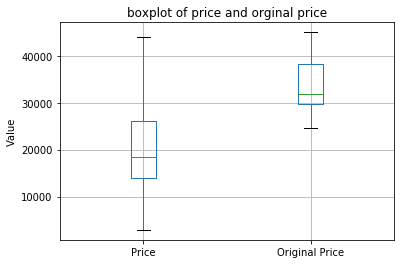

In [51]:
Top_cities.describe()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 

#fig, ax = plt.subplots(figsize=(10,  10))
#Top_cities.boxplot(['Price', 'Year', 'Mileage','Original Price', 'serviceTime','DepreciationRate','Gdp' ])
#Top_cities.boxplot(['Price',  'Original Price' ],layout=(1,2000))
 
import pandas as pd
import matplotlib.pyplot as plt
x = Top_cities.boxplot(column=['Price','Original Price'],  )
x.set_ylabel('Value')
x.set_title('boxplot of price and orginal price')


In [93]:
Top_cities.Make.value_counts()

CHEVROLET     853
NISSAN        433
JEEP          317
HONDA         290
BMW           287
VOLKSWAGEN    251
GMC           198
HYUNDAI       197
FORD          191
Name: Make, dtype: int64

Text(0.5,1,'boxplot of GDP')

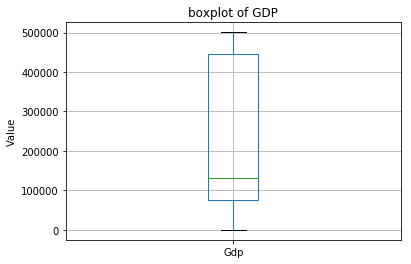

In [53]:
gdp = Top_cities.boxplot([ 'Gdp' ])
gdp.set_ylabel('Value')
gdp.set_title('boxplot of GDP')


 

Text(0.5,1,'boxplot of DepreciationRate')

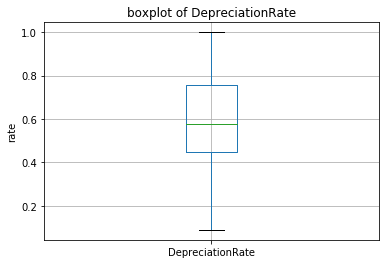

In [54]:
DepreciationRate = Top_cities.boxplot([  'DepreciationRate'  ])
DepreciationRate.set_ylabel('rate')
DepreciationRate.set_title('boxplot of DepreciationRate')



Text(0.5,1,'boxplot of serviceTime')

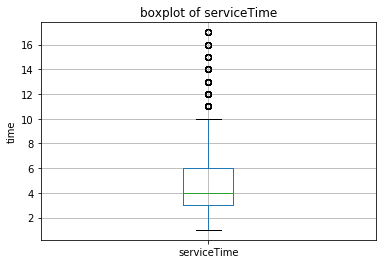

In [55]:
serviceTime = Top_cities.boxplot(['serviceTime'])
serviceTime.set_ylabel('time')
serviceTime.set_title('boxplot of serviceTime')



In [97]:
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [106]:
lm = sm.OLS(Top_cities.DepreciationRate, sm.add_constant(Top_cities.Mileage)).fit()

In [107]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       DepreciationRate   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     981.9
Date:                Fri, 16 Nov 2018   Prob (F-statistic):          7.96e-187
Time:                        15:14:12   Log-Likelihood:                 946.21
No. Observations:                3017   AIC:                            -1888.
Df Residuals:                    3015   BIC:                            -1876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7262      0.005    136.861      0.0

C:\Users\Krystal\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


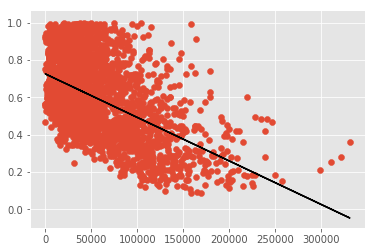

In [110]:
plt.scatter(Top_cities.Mileage,Top_cities.DepreciationRate)
plt.plot(Top_cities.Mileage, lm.predict(), color = 'black', c = 'DarkBlue')
plt.show()
